In [18]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import numpy as np

# Data Cleaning

In [19]:
# set ID as the index
df = pd.read_csv("mental_health_extended.csv", index_col="ID")

# Only want these fields
df_focus = df[["Age", "Stress_Level", "Social_Support_Score"]]

# Ensure everything is numeric. If a value can't be converted, it becomes NaN which is then
# filled by a 0
df_focus = df_focus.apply(pd.to_numeric, errors="coerce").fillna(0)

# Selecting the K Value

In [20]:
inertia_vals = []

for test_k in range(2,31):
    print("test k: ", test_k)

    test_k_model = MiniBatchKMeans(
        n_clusters=test_k,
        n_init=15,
        max_iter=500,
        tol=0.5,
        reassignment_ratio=0.5,
        random_state=42
    )

    test_k_model.fit(df_focus)

    inertia = test_k_model.inertia_

    # store to plot later
    inertia_vals.append((test_k, inertia))

# Convert inertia_vals (list) to a DataFrame to plot
inertia_df = pd.DataFrame(inertia_vals, columns=["k", "inertia"])


test k:  2
test k:  3
test k:  4
test k:  5
test k:  6
test k:  7
test k:  8
test k:  9
test k:  10
test k:  11
test k:  12
test k:  13
test k:  14
test k:  15
test k:  16
test k:  17
test k:  18
test k:  19
test k:  20
test k:  21
test k:  22
test k:  23
test k:  24
test k:  25
test k:  26
test k:  27
test k:  28
test k:  29
test k:  30


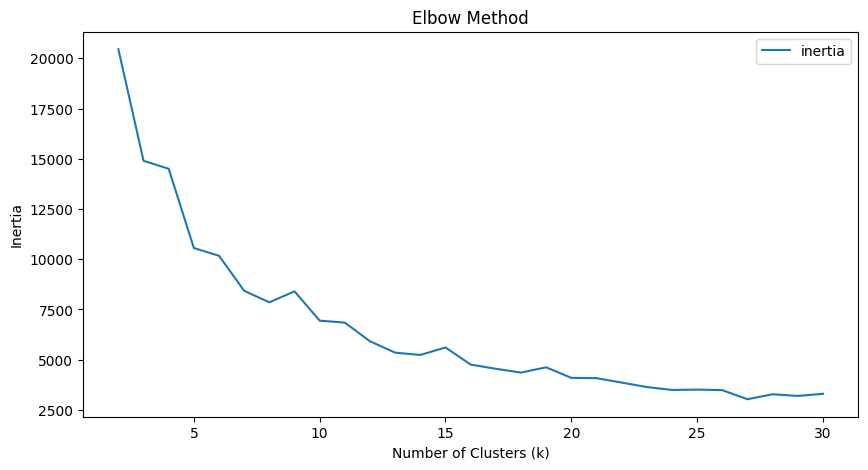

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
inertia_df.plot("k", "inertia", ax=ax)

ax.set_xlabel("Number of Clusters (k)")
ax.set_ylabel("Inertia")
ax.set_title("Elbow Method")
plt.show()


# Clustering

In [23]:
clustering = MiniBatchKMeans(
    n_clusters=11,
    n_init=15,
    max_iter=500,
    tol=0.5,
    reassignment_ratio=0.5,
    random_state=42
)

# Train clustering model
cluster_labels = clustering.fit_predict(df_focus)

# DataFrame that stores cluster_labels with ID as index
# "Cluster" is the column name and cluster_labels are the values under that column
cluster_df = pd.DataFrame({"Cluster": cluster_labels}, index=df_focus.index)

rand_num_gen = np.random.default_rng(42)

for cluster_id, cluster in cluster_df.groupby("Cluster"):
    print(f"Cluster {cluster_id}")
    if len(cluster) < 5:
        to_print = len(cluster)
    else:
        to_print = 5

    sampled = rand_num_gen.choice(cluster.index.to_numpy(), size=to_print, replace=False)

    for id in sampled:
        # Get row of id
        row = df_focus.loc[id]
        age = row["Age"]
        stress = row["Stress_Level"]
        social = row["Social_Support_Score"]
        print(f" ID: {id}\n  Age: {age}\n  Stress Level: {stress}\n  Social Support Score: {social}\n")

Cluster 0
 ID: 665
  Age: 14
  Stress Level: 5
  Social Support Score: 4

 ID: 457
  Age: 15
  Stress Level: 6
  Social Support Score: 5

 ID: 609
  Age: 17
  Stress Level: 8
  Social Support Score: 2

 ID: 149
  Age: 15
  Stress Level: 8
  Social Support Score: 1

 ID: 989
  Age: 16
  Stress Level: 9
  Social Support Score: 1

Cluster 1
 ID: 928
  Age: 19
  Stress Level: 6
  Social Support Score: 8

 ID: 36
  Age: 19
  Stress Level: 5
  Social Support Score: 6

 ID: 455
  Age: 18
  Stress Level: 8
  Social Support Score: 6

 ID: 713
  Age: 21
  Stress Level: 9
  Social Support Score: 3

 ID: 656
  Age: 17
  Stress Level: 9
  Social Support Score: 4

Cluster 2
 ID: 459
  Age: 24
  Stress Level: 3
  Social Support Score: 10

 ID: 820
  Age: 22
  Stress Level: 4
  Social Support Score: 8

 ID: 423
  Age: 22
  Stress Level: 1
  Social Support Score: 10

 ID: 350
  Age: 23
  Stress Level: 3
  Social Support Score: 10

 ID: 198
  Age: 24
  Stress Level: 2
  Social Support Score: 8

Cluster 

In [9]:
cluster_df

,Cluster
ID,
1,11
2,7
3,8
4,0
5,3
...,...
996,3
997,5
998,10
